In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

## Reading the image

In [3]:
img_array=cv2.imread("images/train/angry/0.jpg")

## Shape of the image array

In [4]:
img_array.shape #rgb

(48, 48, 3)

In [5]:
print(img_array)

[[[ 72  72  72]
  [ 78  78  78]
  [ 81  81  81]
  ...
  [ 52  52  52]
  [ 43  43  43]
  [ 40  40  40]]

 [[ 65  65  65]
  [ 62  62  62]
  [ 59  59  59]
  ...
  [ 55  55  55]
  [ 52  52  52]
  [ 45  45  45]]

 [[ 47  47  47]
  [ 42  42  42]
  [ 60  60  60]
  ...
  [ 47  47  47]
  [ 54  54  54]
  [ 49  49  49]]

 ...

 [[ 91  91  91]
  [ 65  65  65]
  [ 46  46  46]
  ...
  [ 74  74  74]
  [ 54  54  54]
  [ 43  43  43]]

 [[ 76  76  76]
  [ 80  80  80]
  [ 76  76  76]
  ...
  [108 108 108]
  [ 69  69  69]
  [ 46  46  46]]

 [[ 77  77  77]
  [ 74  74  74]
  [ 81  81  81]
  ...
  [105 105 105]
  [108 108 108]
  [ 82  82  82]]]


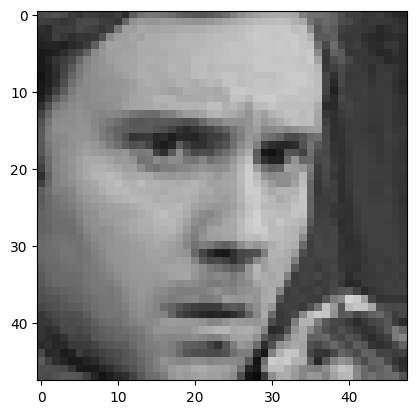

In [6]:
plt.imshow(img_array)

## folder path of training dataset

In [7]:
Datadirectory="images/train/"

In [8]:
classes=["angry","disgust","fear","happy","neutral","sad","surprise"]

## reading all the images

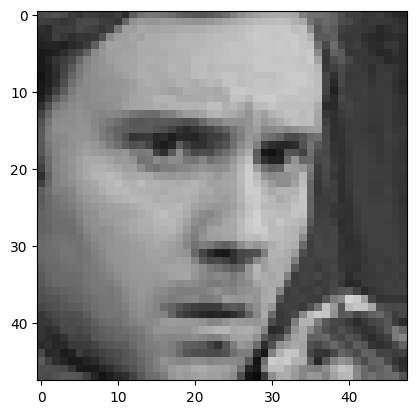

In [9]:
for category in classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

## change the size of image

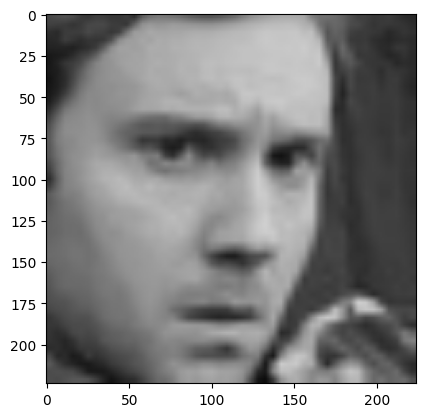

In [10]:
img_size=224 #ImageNet=244x244
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
new_array.shape

(224, 224, 3)

## converting all images to array

In [12]:
training_Data=[] #data array
def create_training_Data():
    for category in classes:
        path=os.path.join(Datadirectory,category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [13]:
create_training_Data()

In [14]:
print(len(training_Data))

28821


In [15]:
#deep learning model should not learn the sequence
import random

random.shuffle(training_Data)

In [16]:
x=[]  #data/feature
y=[]  #label

for features,label in training_Data:
    x.append(features)
    y.append(label)

x=np.array(x).reshape(-1,img_size,img_size,3)  #converting into 4 dimensions because MobileNet

In [17]:
x.shape

(28821, 224, 224, 3)

## Normalizing the data

In [18]:
x

array([[[[ 45,  45,  45],
         [ 45,  45,  45],
         [ 45,  45,  45],
         ...,
         [ 36,  36,  36],
         [ 36,  36,  36],
         [ 36,  36,  36]],

        [[ 45,  45,  45],
         [ 45,  45,  45],
         [ 45,  45,  45],
         ...,
         [ 36,  36,  36],
         [ 36,  36,  36],
         [ 36,  36,  36]],

        [[ 45,  45,  45],
         [ 45,  45,  45],
         [ 45,  45,  45],
         ...,
         [ 36,  36,  36],
         [ 36,  36,  36],
         [ 36,  36,  36]],

        ...,

        [[150, 150, 150],
         [150, 150, 150],
         [150, 150, 150],
         ...,
         [ 85,  85,  85],
         [ 86,  86,  86],
         [ 86,  86,  86]],

        [[150, 150, 150],
         [150, 150, 150],
         [150, 150, 150],
         ...,
         [ 85,  85,  85],
         [ 86,  86,  86],
         [ 86,  86,  86]],

        [[150, 150, 150],
         [150, 150, 150],
         [150, 150, 150],
         ...,
         [ 85,  85,  85],
        

In [19]:
batch_size = 1000  # Adjust this according to your system's memory constraints

# Process data in batches
num_samples = x.shape[0]
for i in range(0, num_samples, batch_size):
    batch_x = x[i:i+batch_size]
    batch_x = batch_x.astype(np.float32)  # Convert to float32 if needed
    batch_x /= 255.0

In [20]:
y[1000]

3

In [21]:
type(y)

list

In [22]:
y=np.array(y)

In [23]:
y.shape

(28821,)

# Deep learning model

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
model = tf.keras.applications.MobileNetV2()  #pre trained model

In [26]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [27]:
base_input = model.layers[0].input

In [28]:
base_output=model.layers[-2].output

In [29]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [30]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [31]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [32]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [33]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [34]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [35]:
new_model.fit(x, y , epochs=25)

Epoch 1/25
901/901 [==============================] - 3226s 4s/step - loss: 1.2642 - accuracy: 0.5230
Epoch 2/25
901/901 [==============================] - 2834s 3s/step - loss: 1.0731 - accuracy: 0.5987
Epoch 3/25
901/901 [==============================] - 2904s 3s/step - loss: 0.9910 - accuracy: 0.6287
Epoch 4/25
901/901 [==============================] - 3207s 4s/step - loss: 0.9339 - accuracy: 0.6500
Epoch 5/25
901/901 [==============================] - 3587s 4s/step - loss: 0.8845 - accuracy: 0.6709
Epoch 6/25
901/901 [==============================] - 2858s 3s/step - loss: 0.8325 - accuracy: 0.6914
Epoch 7/25
901/901 [==============================] - 3144s 3s/step - loss: 0.7766 - accuracy: 0.7134
Epoch 8/25
901/901 [==============================] - 4495s 5s/step - loss: 0.7293 - accuracy: 0.7313
Epoch 9/25
901/901 [==============================] - 2850s 3s/step - loss: 0.6750 - accuracy: 0.7538
Epoch 10/25
901/901 [==============================] - 3212s 4s/step - loss: 0.621

In [36]:
new_model.save('final_model.h5')  #saving the file in h5 format

C:\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
new_model.save_weights('final_model_weights.h5')   #saving the weights of model

In [38]:
#saving in json file
model_json = new_model.to_json()
with open("new_model.json", "w") as json_file:
    json_file.write(model_json)

# Testing on a new image

In [80]:
#frame=cv2.imread("happyboy.jpg")
frame=cv2.imread("images/validation/happy/62.jpg")

In [81]:
frame.shape

(48, 48, 3)

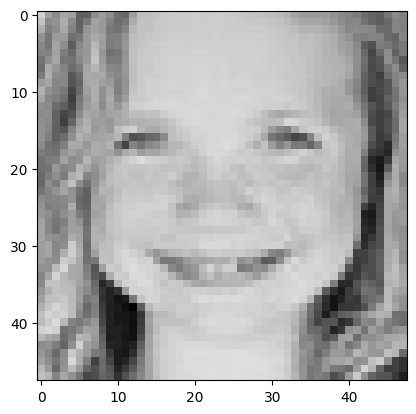

In [82]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

we need only face so we will need algo for face only but it works on gray images only so for future we need to convert it into gray images

In [83]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [84]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

In [85]:
gray.shape

(48, 48, 3)

In [86]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces)==0:
        print('Face not detected')
    else:
        for (ex, ey, ew, eh) in faces:
            face_roi = roi_color[ey: ey+eh, ex:ex +ew]

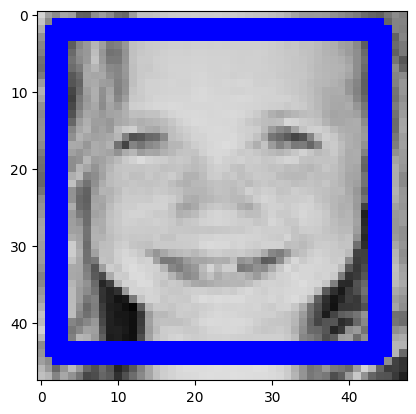

In [87]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [88]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [89]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 294ms/step


In [90]:
Predictions[0]

array([0.5339163 , 0.00117675, 0.02506691, 0.17313091, 0.14812952,
       0.06576519, 0.05281435], dtype=float32)

In [91]:
np.argmax(Predictions)

0

In [92]:
predicted_class_index = np.argmax(Predictions)
predicted_class_label = classes[predicted_class_index]
predicted_class_label

'angry'

In [77]:
frame=cv2.imread("images/validation/62.jpg")